In [1]:
import numpy as np
from tqdm import tqdm
import os

from videograph import VideoGraph
from utils.general import *
from utils.video_processing import *
from utils.chat_api import *
from prompts import *

from face_processing import process_faces
from voice_processing import process_voices
from memory_processing import (
    process_captions,
    generate_captions_and_thinkings_with_ids,
)

/usr/local/lib/python3.9/dist-packages/bytedtrace/__init__.py:108: UserWarning: [bytedtrace] global tracer is already initialized.
  warnings.warn('[bytedtrace] global tracer is already initialized.')


In [2]:
def process_segment(video_graph, base64_video, base64_frames, base64_audio):

    id2voices = process_voices(video_graph, base64_audio, base64_video)
    print("Finish processing voices")

    print(f"processing {len(base64_frames)} frames...")

    id2faces = process_faces(video_graph, base64_frames)
    # print(id2faces.keys())
    print("Finish processing faces")

    episodic_captions, semantic_captions = generate_captions_and_thinkings_with_ids(
        base64_video,
        base64_frames,
        base64_audio,
        id2faces,
        id2voices,
    )

    process_captions(video_graph, episodic_captions, type="episodic")
    process_captions(video_graph, semantic_captions, type="semantic")

    print("Finish processing segment")


def streaming_process_video(
    video_graph, video_path, interval_seconds, fps, segment_limit=None
):
    """Process video segments at specified intervals with given fps.

    Args:
        video_graph (VideoGraph): Graph object to store video information
        video_path (str): Path to the video file or directory containing clips
        interval_seconds (float): Time interval between segments in seconds
        fps (float): Frames per second to extract from each segment

    Returns:
        None: Updates video_graph in place with processed segments
    """
    if os.path.isfile(video_path):
        # Process single video file
        video_info = get_video_info(video_path)
        print(video_info)

        # Process each interval
        count = 0
        for start_time in np.arange(0, video_info["duration"], interval_seconds):
            if start_time + interval_seconds > video_info["duration"]:
                break

            print("=" * 20)
            count += 1

            print(f"Loading {count}-th clip starting at {start_time} seconds...")
            base64_video, base64_frames, base64_audio = process_video_clip(
                video_path, start_time, interval_seconds, fps, audio_format="wav"
            )

            # check dtype
            # print(type(base64_video), type(base64_frames[0]), type(base64_audio))

            # Process frames for this interval
            if base64_frames:
                print(
                    f"Starting processing {count}-th clip starting at {start_time} seconds..."
                )
                process_segment(
                    video_graph,
                    base64_video,
                    base64_frames,
                    base64_audio,
                )

            if segment_limit is not None and count >= segment_limit:
                break

    elif os.path.isdir(video_path):
        # Process directory of numbered clips
        files = os.listdir(video_path)
        # Filter for video files and sort by numeric value in filename
        video_files = [
            f for f in files if any(f.endswith(ext) for ext in [".mp4", ".avi", ".mov"])
        ]
        video_files.sort(key=lambda x: int("".join(filter(str.isdigit, x))))

        for count, video_file in enumerate(video_files, 1):
            print("=" * 20)
            full_path = os.path.join(video_path, video_file)
            print(f"Processing clip {count}: {full_path}")

            base64_video, base64_frames, base64_audio = process_video_clip(
                full_path, 0, None, fps, audio_format="wav"
            )

            if base64_frames:
                process_segment(
                    video_graph,
                    base64_video,
                    base64_frames,
                    base64_audio,
                )

            if segment_limit is not None and count >= segment_limit:
                break

Processing clip 1: data/videos/clipped/5 Poor People vs 1 Secret Millionaire/1.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf61.1.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1280, 720], 'bitrate': 1044, 'fps': 23.976023976023978, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]', 'encoder': 'Lavc61.3.100 libx264'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 129, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 30.0, 'bitrate': 1179, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 

2025-03-25 13:52:18,284 - httpx - INFO - HTTP Request: POST https://search-va.byteintl.net/gpt/openapi/online/multimodal/crawl/openai/deployments/gemini-1.5-pro-002/chat/completions?api-version=2024-03-01-preview "HTTP/1.1 200 OK"


Voice node added with ID 0
Node 0 updated with 1 embeddings
Voice node added with ID 1
Voice node added with ID 2
Voice node added with ID 3
Node 3 updated with 1 embeddings
Finish processing voices
processing 150 frames...


100%|██████████| 19/19 [00:13<00:00,  1.43it/s]


Image node added with ID 4
Image node added with ID 5
Image node added with ID 6
Image node added with ID 7
Image node added with ID 8
Image node added with ID 9
Image node added with ID 10
Image node added with ID 11
Image node added with ID 12
Finish processing faces
id num: 8


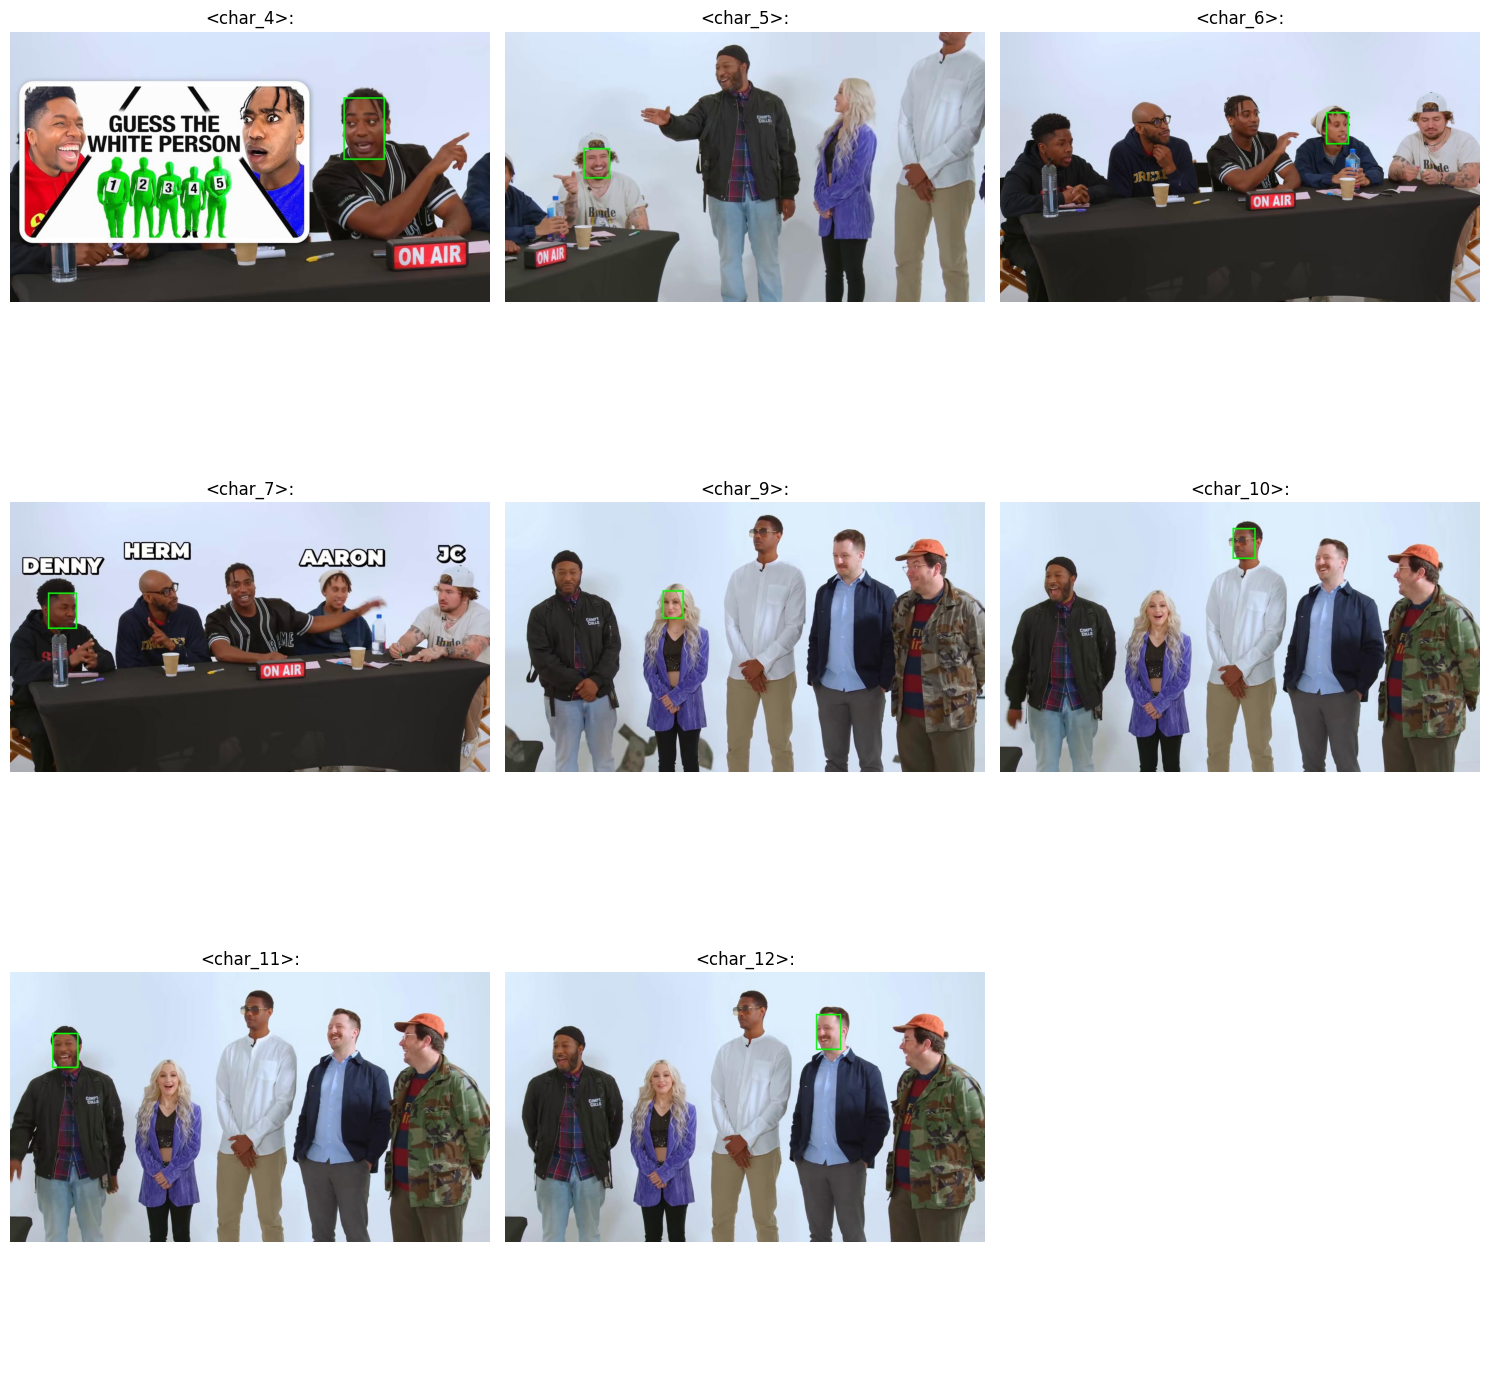

{'<speaker_0>': [{'start_time': '00:00', 'end_time': '00:03', 'content': "We got Denny, Herm, Aaron, and JC and five people who say they're millionaire,"}, {'start_time': '00:05', 'end_time': '00:08', 'content': "but only one of them is. And the other four are lying. Let's just start by just appearances."}], '<speaker_1>': [{'start_time': '00:12', 'end_time': '00:15', 'content': 'I hear that belt. God belt.'}], '<speaker_2>': [{'start_time': '00:16', 'end_time': '00:18', 'content': "That's not right, bro. That's not right, bro."}], '<speaker_3>': [{'start_time': '00:18', 'end_time': '00:21', 'content': "because you wasn't the guest of black president. And I think we had to pay him."}, {'start_time': '00:22', 'end_time': '00:24', 'content': 'Number five, your shoes are elite.'}]}
Generating captions 0 times


2025-03-25 13:52:44,919 - httpx - INFO - HTTP Request: POST https://search-va.byteintl.net/gpt/openapi/online/multimodal/crawl/openai/deployments/gemini-1.5-pro-002/chat/completions?api-version=2024-03-01-preview "HTTP/1.1 200 OK"


Generating thinkings 0 times


2025-03-25 13:52:49,173 - httpx - INFO - HTTP Request: POST https://search-va.byteintl.net/gpt/openapi/online/multimodal/crawl/openai/deployments/gemini-1.5-pro-002/chat/completions?api-version=2024-03-01-preview "HTTP/1.1 200 OK"


['<char_7> wears a black hoodie.', '<char_7> holds a purple marker.', '<char_7> is named Denny.', '<char_8> wears a blue Drexel University sweatshirt and round eyeglasses.', '<char_8> rests his arms on the table.', '<char_8> is named Herm.', '<char_4> wears a white and blue baseball jersey.', '<char_4> gestures with his right hand while speaking.', "<speaker_3>: '<char_4> because you wasn't the guest of black president. And I think we had to pay him.'", '<char_6> wears a blue denim jacket and a white beanie.', '<char_6> holds a plastic water bottle.', '<char_6> is named Aaron.', "<char_5> wears a white t-shirt with the word 'Rude' on it.", '<char_5> points and laughs at <char_11>.', '<char_5> is named JC.', "<char_11> wears light blue jeans and a black and red plaid shirt under a black jacket with 'Comfy Colls' on it.", '<char_11> gestures with his hands while speaking.', "<speaker_1>: '<char_11> I hear that belt. God belt.'", '<char_9> wears a purple blazer over a black top, black pan

In [3]:
video_config = {
    "video_path": "data/videos/clipped/5 Poor People vs 1 Secret Millionaire",
    # "video_path": "/mnt/bn/videonasi18n/longlin.kylin/vlm-agent-benchmarking/data/videos/raw/720p/5 Poor People vs 1 Secret Millionaire.mp4",
    "interval_seconds": 60,
    "fps": 5,
    "segment_limit": 5,
}

memory_config = {
    "max_img_embeddings": 10,
    "max_audio_embeddings": 20,
    "img_matching_threshold": 0.3,
    "audio_matching_threshold": 0.6,
    "text_matching_threshold": 0.75,
}

video_graph = VideoGraph(**memory_config)
# video_path = "/mnt/bn/videonasi18n/longlin.kylin/vlm-agent-benchmarking/data/videos/raw/720p/5 Poor People vs 1 Secret Millionaire.mp4"


streaming_process_video(video_graph, **video_config)

save_dir = "data/video_graphs"
save_video_graph(video_graph, save_dir, (video_config, memory_config))

In [ ]:
config = {
    "video_path": "data/videos/clipped/5 Poor People vs 1 Secret Millionaire",
    # "video_path": "/mnt/bn/videonasi18n/longlin.kylin/vlm-agent-benchmarking/data/videos/raw/720p/5 Poor People vs 1 Secret Millionaire.mp4",
    "interval_seconds": 60,
    "fps": 5,
    "segment_limit": 5,
}
save_dir = "data/video_graphs"
video_graph = load_video_graph(save_dir, config)
video_graph.print_voice_nodes()

---------------------------------------------------------------------------------------------------- Voice Node 0 ----------------------------------------------------------------------------------------------------
Contents: ["We got Denny, Herm, Aaron and JC and five people who say they're millionaire,", "but only one of them is and the other four are lying. Let's just start by just appearances.", 'dress up. They really wear like, like four, three and four very like', "calm because they don't make, you know, they don't stress themselves out. You don't look like he's drifted that.", "We're gazing over number two, our beautiful lady here.", "We got to see you guys. Now, let's just dive into y'all one by one. So number one, tell us your name and your job.", 'What do you do for a living, Labone?', 'Number four, what is your name and what do you do for a living?']
---------------------------------------------------------------------------------------------------- Voice Node 1 -------------

In [ ]:
# from retrieve import retrieve_from_videograph
from videograph import VideoGraph
from utils.chat_api import (
    generate_messages,
    get_response_with_retry,
    parallel_get_embedding,
)
from utils.general import validate_and_fix_python_list
from prompts import prompt_memory_retrieval

MAX_RETRIES = 3


def generate_queries(question, existing_knowledge=None, query_num=1):
    input = [
        {
            "type": "text",
            "content": prompt_memory_retrieval.format(
                question=question,
                query_num=query_num,
                existing_knowledge=existing_knowledge,
            ),
        }
    ]
    messages = generate_messages(input)
    model = "gpt-4o-2024-11-20"
    queries = None
    for i in range(MAX_RETRIES):
        print(f"Generating queries {i} times")
        queries = get_response_with_retry(model, messages)[0]
        queries = validate_and_fix_python_list(queries)
        if queries is not None:
            break
    if queries is None:
        raise Exception("Failed to generate queries")
    return queries


def retrieve_from_videograph(videograph, question, topk=3):
    queries = generate_queries(question)
    print(f"Queries: {queries}")

    model = "text-embedding-3-large"
    query_embeddings = parallel_get_embedding(model, queries)[0]

    related_nodes = []

    for query_embedding in query_embeddings:
        nodes = videograph.search_text_nodes(query_embedding)
        related_nodes.extend(nodes)

    related_nodes = list(set(related_nodes))
    return related_nodes


question = "Denny"
retrieved_nodes = retrieve_from_videograph(video_graph, question)
print(retrieved_nodes)

Generating queries 0 times


2025-03-25 09:34:41,848 - httpx - INFO - HTTP Request: POST https://search-va.byteintl.net/gpt/openapi/online/v2/crawl/openai/deployments/gpt-4o-2024-11-20/chat/completions?api-version=2024-03-01-preview "HTTP/1.1 200 OK"


Queries: ["Information about Denny's background", 'Key events involving Denny', 'Relationships or interactions Denny has with other characters']
[]
